   # Visualizing World Alcohol Consumption


In [198]:
import numpy as np 
import pandas as pd 
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from IPython.core.display import display, HTML
from string import Template
import json

In [21]:
# Read the dataset

data = pd.read_csv('/Users/abhishek/Desktop/visualization-project/wip/data.csv', encoding="ISO-8859-1")

In [22]:
# Let's findout some information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
Country    193 non-null object
Year       193 non-null int64
Beer       193 non-null float64
Wine       193 non-null float64
Spirits    193 non-null float64
Other      193 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.1+ KB


In [23]:
data.head()

,Country,Year,Beer,Wine,Spirits,Other
0,Afghanistan,2010,0.0,0.0,0.0,0.0
1,Albania,2010,31.8,19.8,48.4,0.0
2,Algeria,2010,62.6,35.5,0.0,2.0
3,Andorra,2010,34.6,45.3,20.1,0.0
4,Angola,2010,64.3,13.7,17.4,4.7


In [24]:
data.shape

(193, 6)

As should be obvious, initial two lines in the dataset are without heading, there few No Data esteem in the dataset which I would either expel or change over to zero. I will evacuate the primary column as its a typical heading for every one of the lines and not so much valuable. In this way, the **information cleaning** first.

In [25]:
data.rename(columns=data.iloc[0]).drop(data.index[0], inplace = True)

# It will grab the first row for the header,take data, less the header row and finally set the header row as the data header

In [26]:
data.head()

,Country,Year,Beer,Wine,Spirits,Other
0,Afghanistan,2010,0.0,0.0,0.0,0.0
1,Albania,2010,31.8,19.8,48.4,0.0
2,Algeria,2010,62.6,35.5,0.0,2.0
3,Andorra,2010,34.6,45.3,20.1,0.0
4,Angola,2010,64.3,13.7,17.4,4.7


In [27]:
# Now replace all No data values with 0 with inplace = True option and also rename the "other alochoholic beverages" collumn to "Other"
data.replace('No data',0,inplace=True)
data.rename(columns = {'Other alcoholic beverages':'Other'}, inplace=True)

In [28]:
data.head()

,Country,Year,Beer,Wine,Spirits,Other
0,Afghanistan,2010,0.0,0.0,0.0,0.0
1,Albania,2010,31.8,19.8,48.4,0.0
2,Algeria,2010,62.6,35.5,0.0,2.0
3,Andorra,2010,34.6,45.3,20.1,0.0
4,Angola,2010,64.3,13.7,17.4,4.7


Now, as we have a clean data we can perform our analysis on it. And below are the questions.  

* Top/Bottom countries of different drink types.
* What drinking patterns different countries have? 
*  What are most popular / most consumed drink per country? 

To answer abover questions, lets sort the data by **Type of Drink** and display only top 15 countries per **drink**, and bottom 15 countries per **drink**. Im going to take calculate **avrage** of all the drinks in-order to know if the specific type of alcolol consumption is above/below the avrage for each country.  

In [30]:
data = pd.read_csv('/Users/abhishek/Desktop/visualization-project/wip/data.csv', encoding="ISO-8859-1")

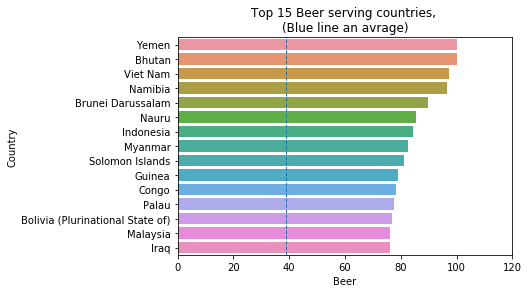

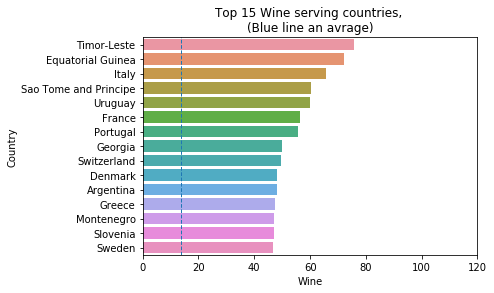

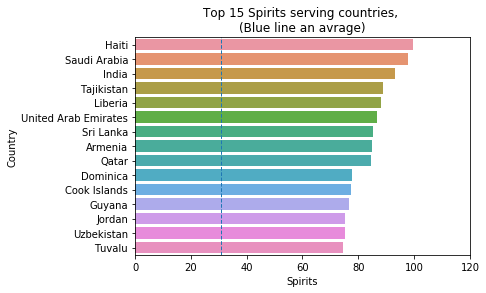

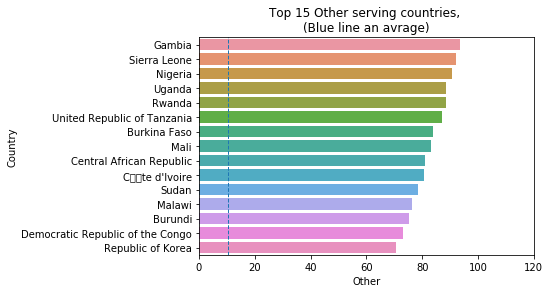

In [49]:
# I'm going to use for loop to iterate through all the columns starting from column 'Beer'
for i in data.columns[2:]:
    drink_type = i
# Sorting the data by type of drink 
    sorted_data = data.sort_values(by=drink_type,ascending=False)
# As maximum of any of my collumn is not more than 100 i'm going to set limits for my 'x' axis 
    plt.xlim(0,120)
# Now, plot the bar 
    bp = sns.barplot(data = sorted_data.head(n=15), orient = 'h',x=drink_type, y='Country')
    plt.axvline(data[drink_type].mean(),linestyle ='dashed', linewidth =1)
    bp.set_title("Top 15 "+ drink_type +" serving countries, \n(Blue line an avrage)")
    plt.show()

In above graphs, we can see top 15 nations with the measure of liquor utilization of an alternate kind, and normal utilization of Beer is around 38 and it would appear that Yemenis drink 60% more than that of normal. Beneath diagram demonstrates the last 15 nations in each drink classification.

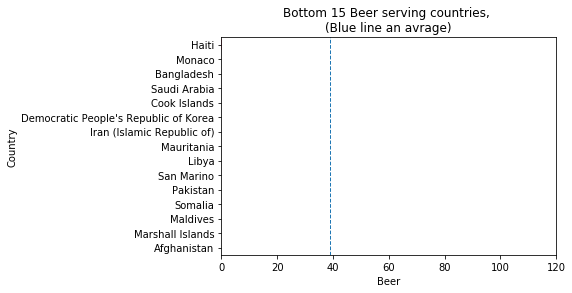

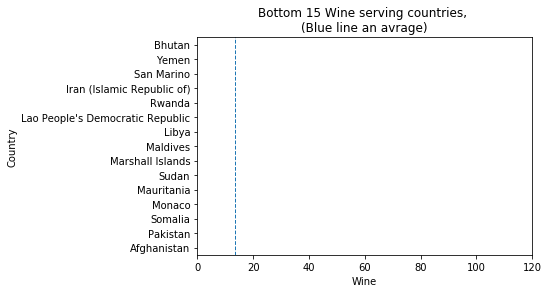

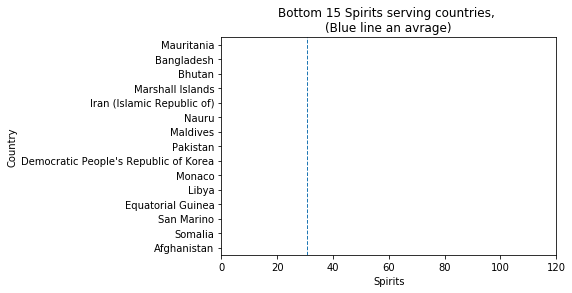

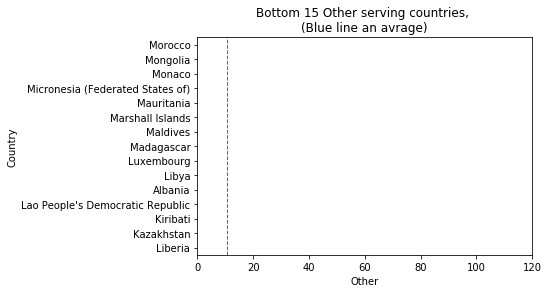

In [53]:
# And for bottom 15 countries: 

for i in data.columns[2:]:
    drink_type = i
# Sorting the data by type of drink 
    sorted_data = data.sort_values(by=drink_type,ascending=False)
# As maximum of any of my collumn is not more than 100 i'm going to set limits for my 'x' axis 
    plt.xlim(0,120)
# Now, plot the bar 
    bp = sns.barplot(data = sorted_data.tail(n=15), orient = 'h',x=drink_type, y='Country')
    plt.axvline(data[drink_type].mean(),linestyle ='dashed', linewidth =1)
    bp.set_title("Bottom 15 "+ drink_type +" serving countries, \n(Blue line an avrage)")
    plt.show()

What drinking patterns different countries have? -  We can see the drinkig patterns across different countries in below stacked bar chart. 

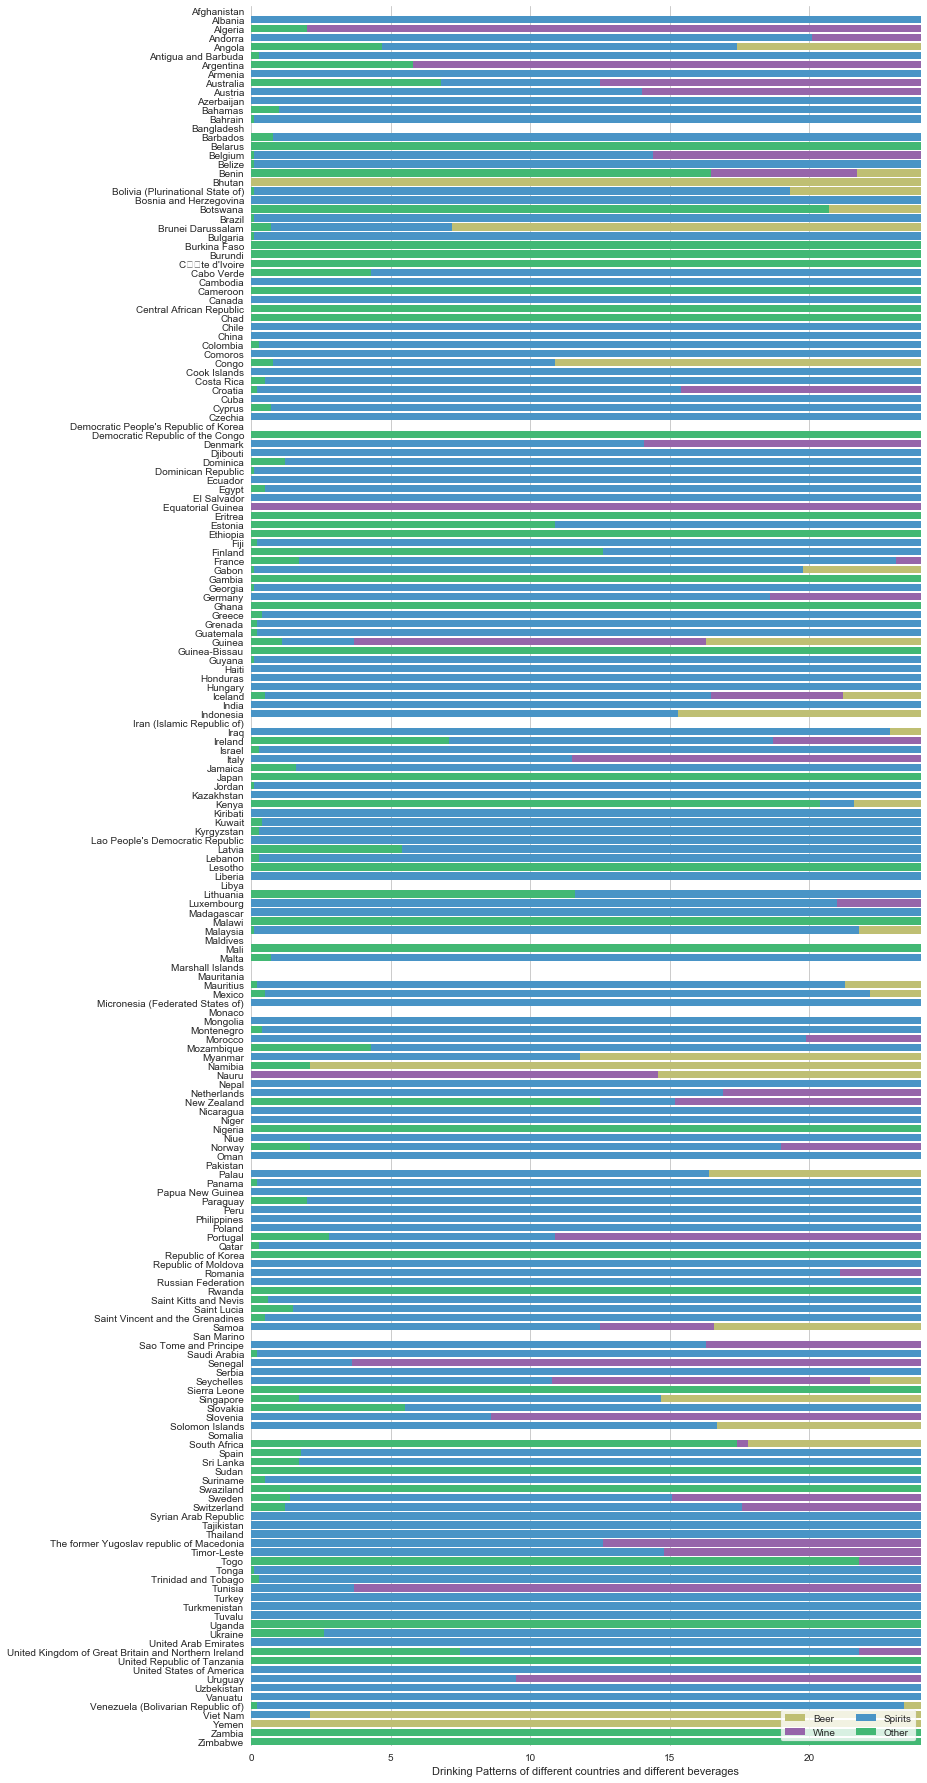

In [145]:

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 32))

# Load dataset
data = pd.read_csv('/Users/abhishek/Desktop/visualization-project/wip/data.csv', encoding="ISO-8859-1")

# Plot the data for Beer
sns.barplot(x="Beer", y="Country", data=data, label="Beer", color="#cccc66")

# Plot the data for Wine
sns.barplot(x="Wine", y="Country", data=data, label="Wine", color="#9b59b6")

# Plot the data for Spirits 
sns.barplot(x="Spirits", y="Country", data=data, label="Spirits",color="#3498db")

# Plot the data for Other drinks
sns.barplot(x="Other", y="Country", data=data, label="Other", color="#2ecc71")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Drinking Patterns of different countries and different beverages")
sns.despine(left=True, bottom=True)

In above diagram, we can see different drinking designs all together for various sorts of beverages. 

Presently, let check whether there is any connection between's various beverages, it may likewise be conceivable that some liquor like a soul is being utilized as a substitute, or for some mixed drink.

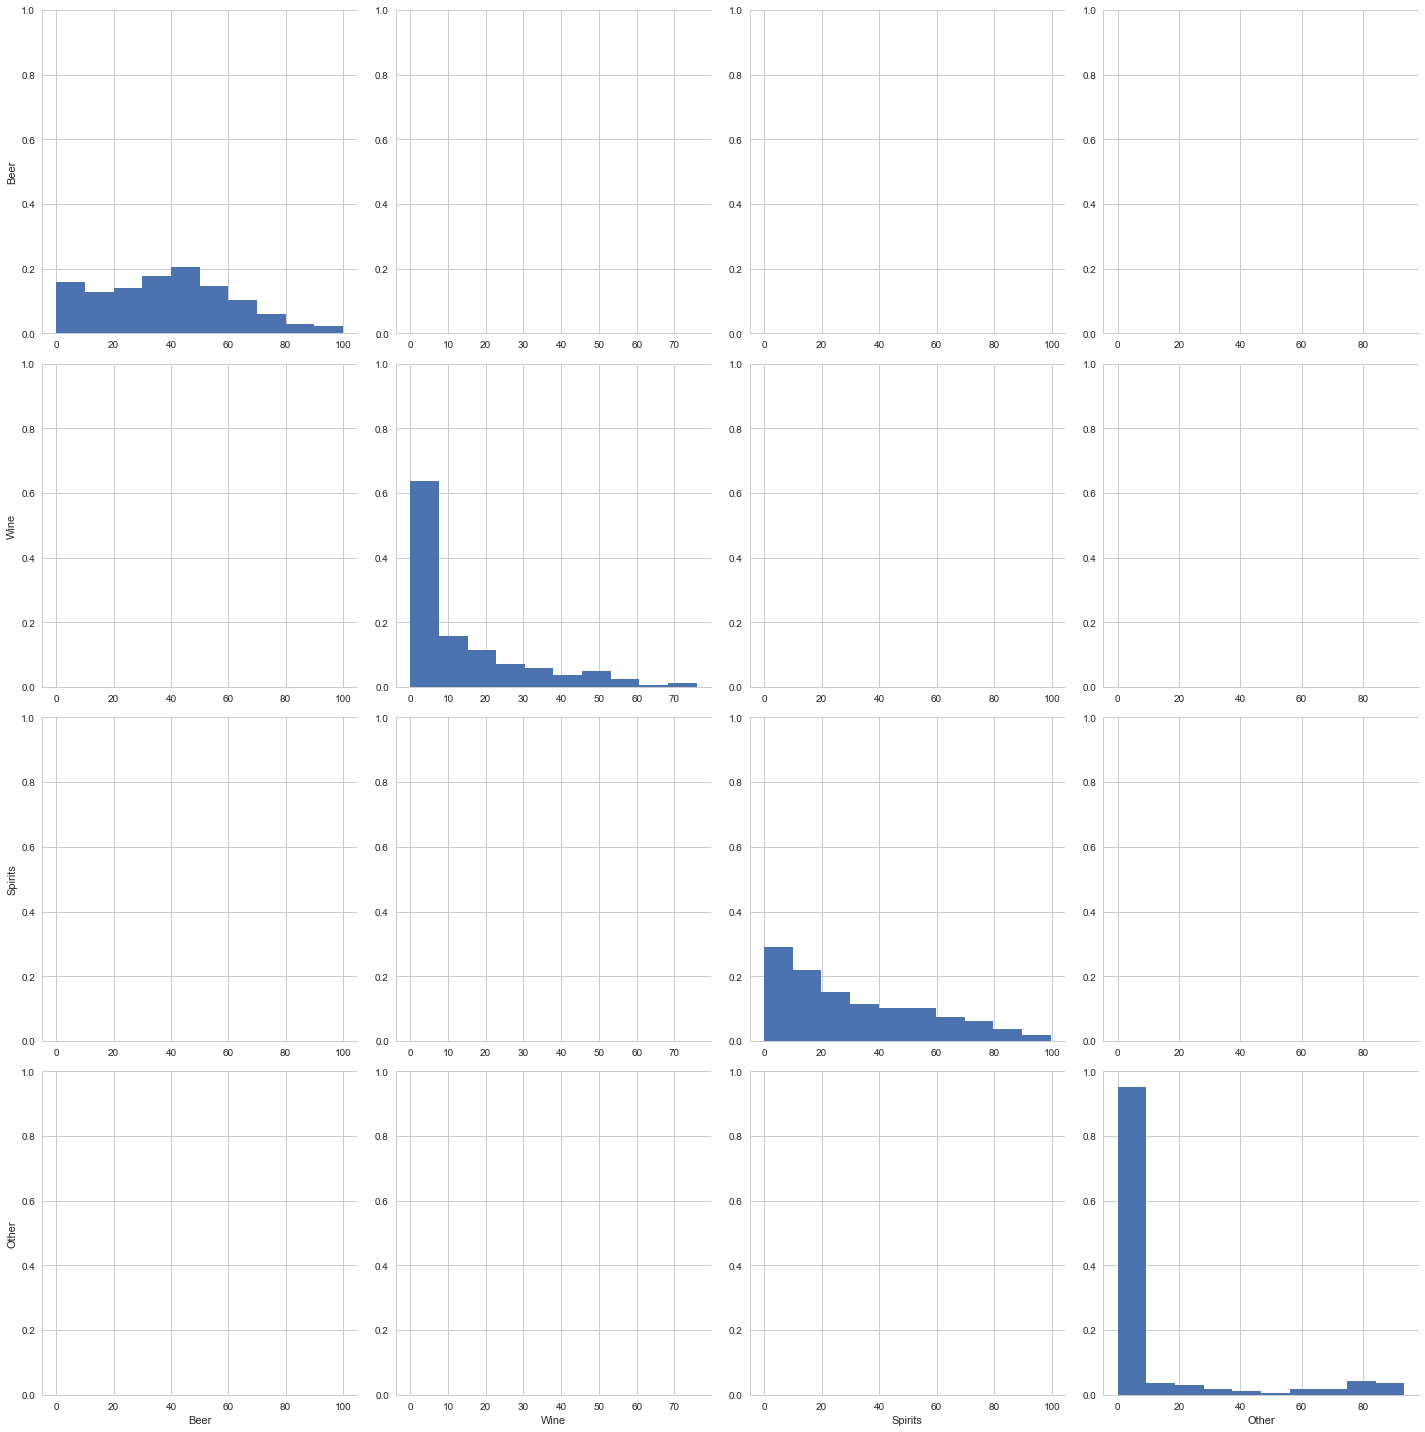

In [197]:
sns.pairplot(data, vars=["Beer", "Wine", "Spirits", "Other"] , kind="corre", size =5)